In [1]:
# from pathlib import Path
# import sys
# sys.path.append(str(Path().resolve().parent.parent))
import os
os.environ['OMP_NUM_THREADS'] = "1"
%env OMP_NUM_THREADS=1

env: OMP_NUM_THREADS=1


calculating p_ij
calculating fidelity
elapsed time:5.271481700008735


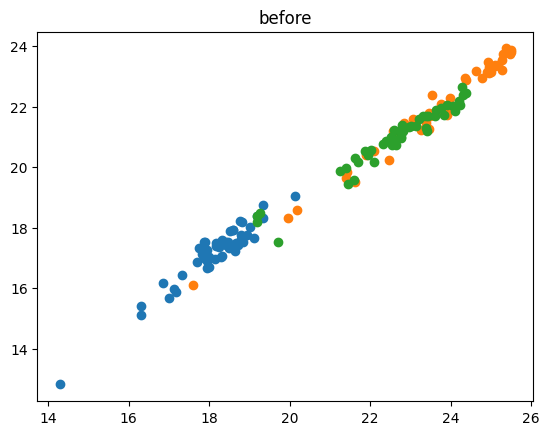

loss=1.0664522045680078
loss=1.0780932525477342
loss=1.0722656857809327
loss=1.0761359005918227
loss=1.0736585865179384
loss=1.0763027810854573
loss=1.074018717866514
loss=1.076063254381852
loss=1.073810936390079
loss=1.077985835785159
loss=1.0717862407209648
loss=1.078214481906498
loss=1.072836058844053
loss=1.0764607309268424
loss=1.0737042446094787
loss=1.0792006377397552
loss=1.0743706134549622
loss=1.0739698202672763
loss=1.072955081041758
loss=1.0761413317583886
loss=1.074547057110282
loss=1.0779067644460536
loss=1.0733565575413646
loss=1.0776542979063746
loss=1.0733908986627716
loss=1.0750007732428606
loss=1.0732431349226452
loss=1.073903581182518
loss=1.072726613306487
loss=1.0768926490922466
loss=1.0709003080981572
loss=1.0776789429662865
loss=1.071414544138857
loss=1.0784841828384133
loss=1.0720545880586596
loss=1.0782317162240596
loss=1.0736268406671434
loss=1.0780820442074734
loss=1.0718222298475608
loss=1.0789621959334987
loss=1.0736389981847236
loss=1.0780456297221088
los

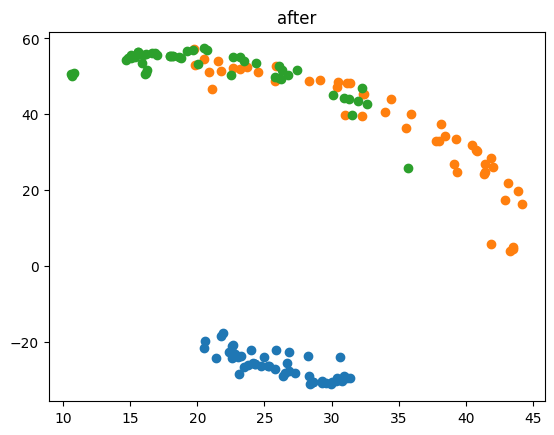

In [3]:
from qnn.new_kernel_tsne import quantum_kernel_tsne
import numpy as np
from quri_parts.circuit import H, CZ
from sklearn.datasets import load_iris, load_digits
from sklearn.preprocessing import MinMaxScaler
from circuit.circuit import LearningCircuit
from numpy.typing import NDArray

def create_quantum_circuit():
    qc = LearningCircuit(n_qubits)

    def preprocess_x(x: NDArray[np.float_], index: int) -> float:
        xa = x[index % len(x)]
        return min(1, max(-1, xa))

    for i in range(n_qubits):
        qc.add_gate(H(i))
    for d in range(depth):
        for i in range(n_qubits):
            qc.add_input_RY_gate(i, lambda x, i=i: preprocess_x(x, i))
        for i in range(n_qubits):
            qc.add_input_RX_gate(i, lambda x, i=i: preprocess_x(x, i))
        if d < depth - 1:
            for i in range(n_qubits):
                qc.add_gate(CZ(i, (i + 1) % n_qubits))
    return qc
X_train, y_train = load_iris(return_X_y=True)
# X_train = X_train / 16.
# X_train = X_train[:200]
# y_train = y_train[:200] #500 => fidelity 81.6[s]
scaler = MinMaxScaler((0, np.pi / 2))
n_qubits = 12
depth = 1

X_train = scaler.fit_transform(X_train)
qk_tsne = quantum_kernel_tsne(max_iter=1000)
qk_tsne.init(create_quantum_circuit, [])
qk_tsne.train(X_train, y_train, method="COBYLA")
